In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import numpy as np

In [ ]:
import seaborn as sns
%matplotlib inline

REMOVE NULL VALUES

In [ ]:
purge_null = (['null'])
df = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date__20231219.csv',na_values=purge_null)

In [ ]:
df.shape

(170095, 19)

In [ ]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

FILTER DATA SET

In [ ]:
df[['LAW_CAT_CD','ARREST_BORO', 'PERP_RACE']]


,LAW_CAT_CD,ARREST_BORO,PERP_RACE
0,F,K,BLACK
1,F,K,BLACK
2,F,K,WHITE
3,F,M,BLACK
4,F,K,BLACK
...,...,...,...
170090,F,B,BLACK
170091,M,B,BLACK
170092,M,S,WHITE HISPANIC
170093,M,K,BLACK


FILTER RACES TO BLACK, WHITE, WHITE AND BLACK HISPANIC FOR COMPARISON

In [ ]:
df = df[df['PERP_RACE'].isin(['WHITE HISPANIC', 'BLACK HISPANIC', 'BLACK', 'WHITE'])]

In [ ]:
df.groupby(['PERP_RACE'])['PERP_RACE'].count().sort_values(ascending = True)

PERP_RACE
WHITE             16373
BLACK HISPANIC    16501
WHITE HISPANIC    43081
BLACK             82041
Name: PERP_RACE, dtype: int64

CREATE GRAPH BLACK AND WHITE, HISPANIC AND BLACK HISPANIC GRAPH FOR COMPARISON

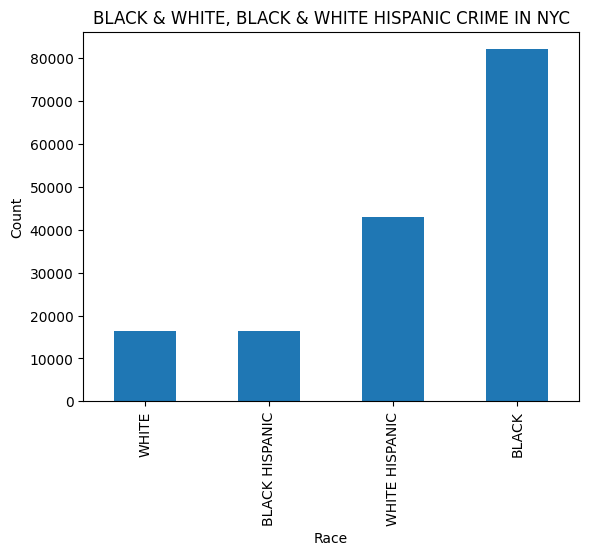

In [ ]:
df.groupby(['PERP_RACE'])['PERP_RACE'].count().sort_values(ascending=True).plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('BLACK & WHITE, BLACK & WHITE HISPANIC CRIME IN NYC')
plt.show()

FILTER FOR BLACK HISPANIC / WHITE HISPANIC COMPARISON

In [ ]:
df = df[df['PERP_RACE'].isin(['WHITE HISPANIC', 'BLACK HISPANIC'])]
df['PERP_RACE'].unique()

array(['WHITE HISPANIC', 'BLACK HISPANIC'], dtype=object)


RENAMING ARREST BOROUGHS FOR CHARTING AND COMPARISON

In [ ]:
df['ARREST_BORO'].unique()

array(['M', 'B', 'Q', 'K', 'S'], dtype=object)

In [ ]:
boro_map = {
    'K': 'Brooklyn',
    'M': 'Manhattan',
    'Q': 'Queens',
    'B': 'Bronx',
    'S': 'Staten Island'
}

df['ARREST_BORO'] = df['ARREST_BORO'].replace(boro_map)

In [ ]:
df['ARREST_BORO'].unique()

array(['Manhattan', 'Bronx', 'Queens', 'Brooklyn', 'Staten Island'],
      dtype=object)

IDENTIFY LAW CATEGORIES THEN FILTER TO FELONY AND MISDEMEANOR

In [ ]:
df['LAW_CAT_CD'].unique()

array(['F', 'M', '9', nan, 'V', 'I'], dtype=object)

In [ ]:
df = df[df['LAW_CAT_CD'].isin(['F','M'])]

In [ ]:
df['LAW_CAT_CD'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
charge_key = {'F': 'Felony', 'M': 'Misdemeanor'}
df['LAW_CAT_CD'] = df['LAW_CAT_CD'].replace(charge_key)


In [ ]:
df['LAW_CAT_CD'].unique()

array(['Felony', 'Misdemeanor'], dtype=object)

In [ ]:
df.groupby(['LAW_CAT_CD'])['LAW_CAT_CD'].count().sort_values(ascending = True)

LAW_CAT_CD
Felony         24755
Misdemeanor    33752
Name: LAW_CAT_CD, dtype: int64

INDIVIDUAL COUNT OF FELONY AND MISDEMEANOR CHARGES FOR BLACK AND WHITE HISPANICS

In [ ]:
felony_data = df[df['LAW_CAT_CD'] == 'Felony']
filtered_data = felony_data[ (felony_data['PERP_RACE'] == 'BLACK HISPANIC') | (felony_data['PERP_RACE'] == 'WHITE HISPANIC') | (felony_data['PERP_RACE'] == 'WHITE')]
felony_counts = filtered_data['PERP_RACE'].value_counts()
print(felony_counts)

WHITE HISPANIC    17749
BLACK HISPANIC     7006
Name: PERP_RACE, dtype: int64


In [ ]:
misdemeanor_data = df[df['LAW_CAT_CD'] == 'Misdemeanor']
filtered_data = misdemeanor_data[ (misdemeanor_data['PERP_RACE'] == 'BLACK HISPANIC') | (misdemeanor_data['PERP_RACE'] == 'WHITE HISPANIC') | (misdemeanor_data['PERP_RACE'] == 'WHITE')]
misdemeanor_counts = filtered_data['PERP_RACE'].value_counts()
print(misdemeanor_counts)

WHITE HISPANIC    24578
BLACK HISPANIC     9174
Name: PERP_RACE, dtype: int64


BAR CHART SHOWING ALL HISPANIC CRIME IN NYC

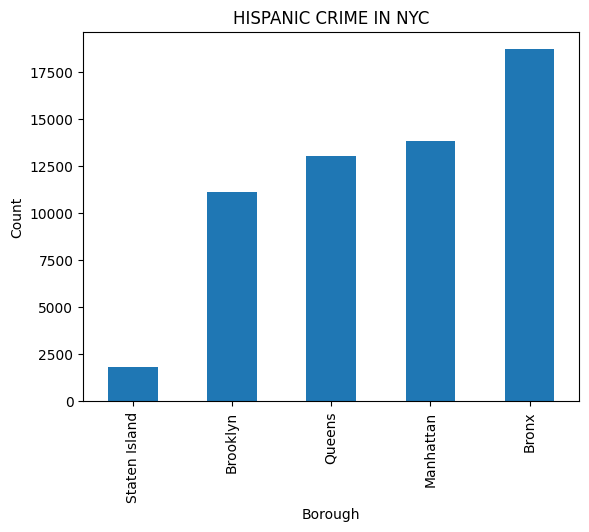

In [ ]:
df.groupby(['ARREST_BORO'])['ARREST_BORO'].count().sort_values(ascending=True).plot(kind='bar')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.title('HISPANIC CRIME IN NYC')
plt.show()

BAR CHART SHOWING BLACK & WHITE HISPANIC CRIME COMPARRISON

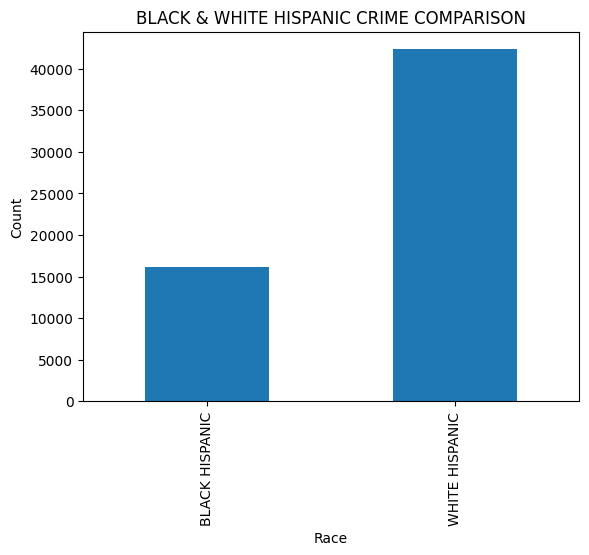

In [ ]:
df.groupby(['PERP_RACE'])['PERP_RACE'].count().sort_values(ascending=True).plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('BLACK & WHITE HISPANIC CRIME COMPARISON')

plt.show()

BAR CHART SHOWING BLACK & WHITE HISPANIC ARRESTS BY BOROUGH

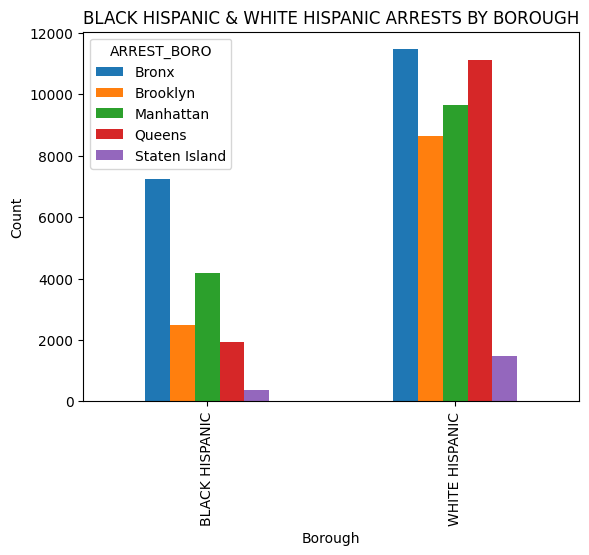

In [ ]:
df.groupby(['PERP_RACE', 'ARREST_BORO'])['PERP_RACE'].count().unstack().fillna(0).plot(kind='bar')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.title('BLACK HISPANIC & WHITE HISPANIC ARRESTS BY BOROUGH')
plt.show()